#Read

In [4]:
# from google.colab import drive
import pandas as pd
# drive.mount('/content/drive')

file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification-new (1).csv"
file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification (1).csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

df = pd.concat([df_2024, df_2022], ignore_index=True)
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])


In [86]:
df

,Name,Price,Side,Volume,Order_Executed,Target,day,month,year,hour,minute,second,day_of_week
0,373019,7500000.0,1,444,0,90,5,9,2022,6,25,0,2
1,373019,6890000.0,1,600,0,90,5,9,2022,6,25,0,2
2,175018,96000000.0,0,500,0,0,5,9,2022,6,25,0,2
3,373019,7090000.0,1,600,0,90,5,9,2022,6,25,0,2
4,373019,7390000.0,1,550,0,90,5,9,2022,6,25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27189557,85097913,3900000.0,1,1,1,0,25,7,2024,14,34,59,5
27189558,85097913,3900000.0,1,3,1,0,25,7,2024,14,34,59,5
27189559,85097509,1900000.0,0,1,1,0,25,7,2024,14,34,59,5
27189560,85009975,30800000.0,0,1,1,0,25,7,2024,14,34,59,5


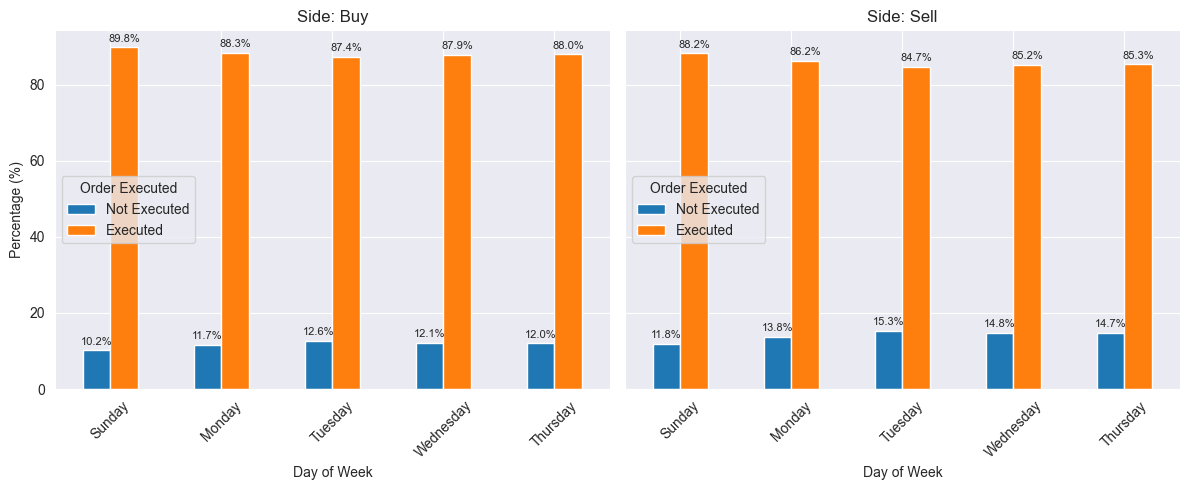

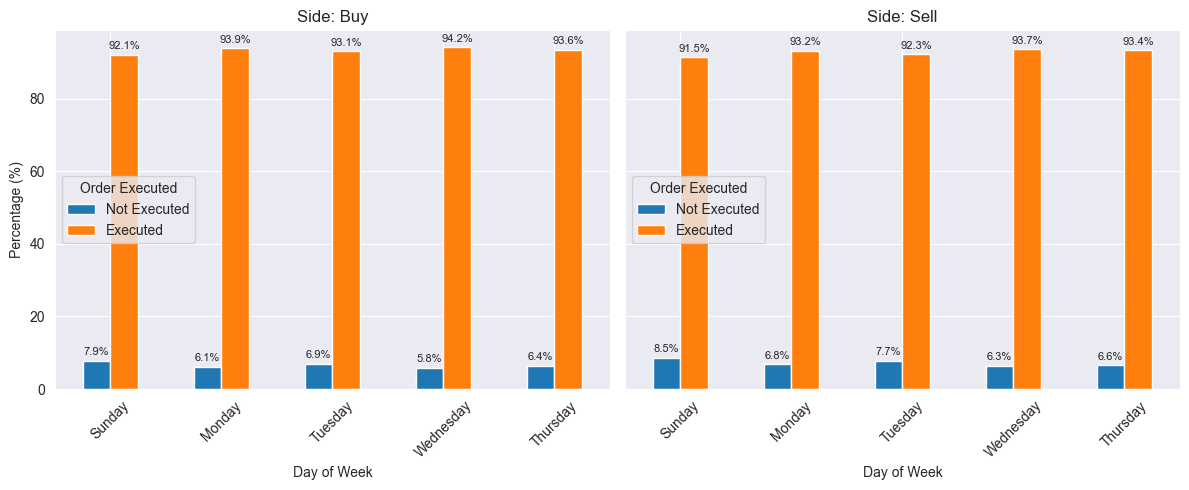

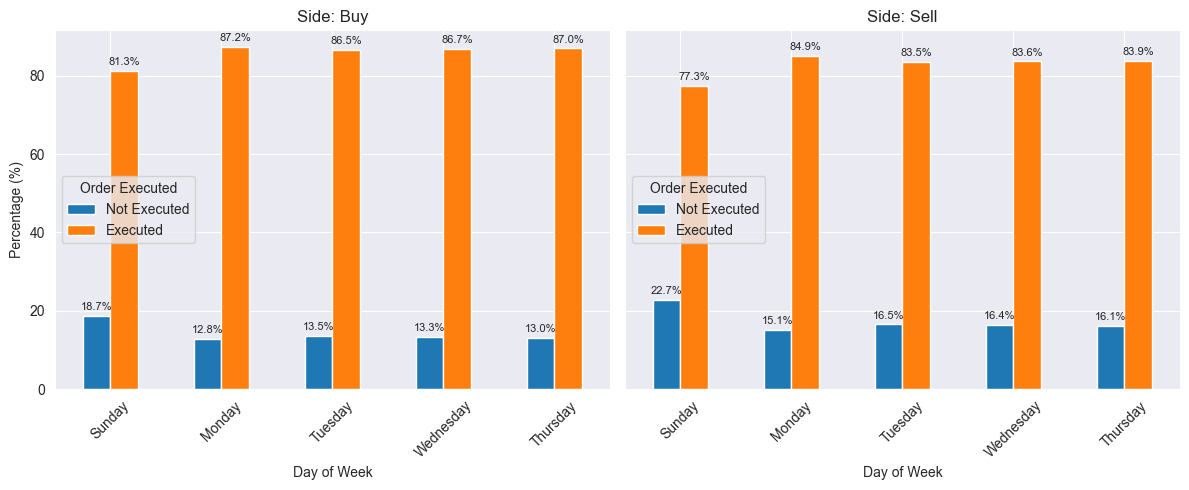

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_best_day(df):

    # Group and calculate percentage
    grouped = df.groupby(['Side', 'day_of_week', 'Order_Executed']).size().reset_index(name='count')
    total_per_group = grouped.groupby(['Side', 'day_of_week'])['count'].transform('sum')
    grouped['percentage'] = 100 * grouped['count'] / total_per_group

    # Mapping
    side_map = {0: 'Buy', 1: 'Sell'}
    day_map = {
        1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
        4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'
    }
    filtered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

    # Apply mappings
    grouped['Side'] = grouped['Side'].map(side_map)
    grouped['day_of_week'] = grouped['day_of_week'].map(day_map)

    # Filter days
    grouped = grouped[grouped['day_of_week'].isin(filtered_days)]

    # Filter out sides with no data
    sides = grouped['Side'].unique()
    sides = [s for s in sides if not grouped[grouped['Side'] == s].empty]

    # Plot
    fig, axes = plt.subplots(1, len(sides), figsize=(12, 5), sharey=True)

    for i, side in enumerate(sides):
        side_data = grouped[grouped['Side'] == side]
        pivot = side_data.pivot(index='day_of_week', columns='Order_Executed', values='percentage').fillna(0)
        pivot = pivot.reindex(filtered_days)
        pivot.rename(columns={0: 'Not Executed', 1: 'Executed'}, inplace=True)

        ax = axes[i]
        bars = pivot.plot(kind='bar', stacked=False, ax=ax, title=f'Side: {side}')

        for bar_container in bars.containers:
            for bar in bar_container:
                height = bar.get_height()
                if height > 0:
                    bars.text(
                        bar.get_x() + bar.get_width() / 2,
                        height + 1,
                        f'{height:.1f}%',
                        ha='center',
                        va='bottom',
                        fontsize=8
                    )

        ax.set_ylabel('Percentage (%)' if i == 0 else "")
        ax.set_xlabel('Day of Week')
        ax.legend(title='Order Executed')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()



plot_best_day(df)
plot_best_day(df_2024)
plot_best_day(df_2022)

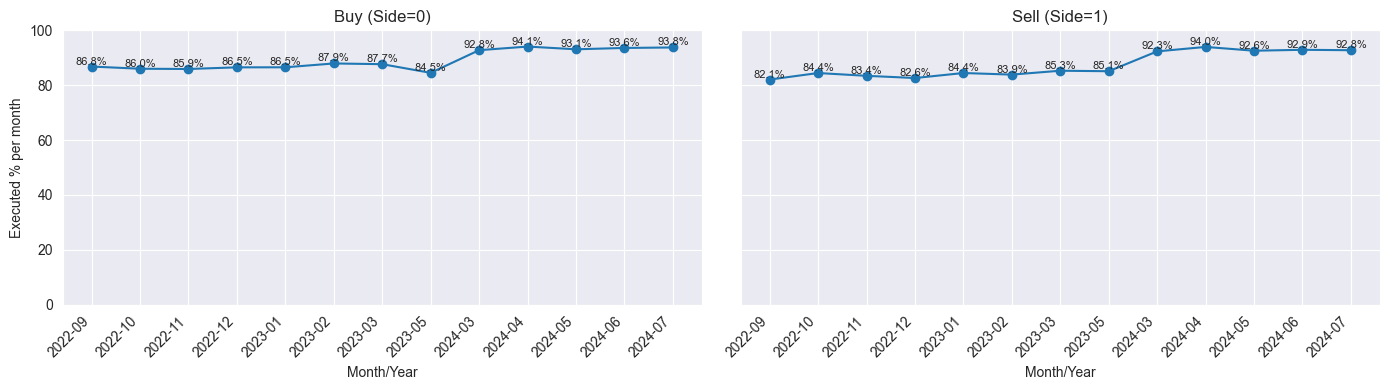

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ── 1.  Prep ──────────────────────────────────────────────
df1 = df.copy()
df1['month'] = pd.to_datetime(df1['time']).dt.to_period('M')
df1['Order_Executed'] = pd.to_numeric(df1['Order_Executed'], errors='coerce')

monthly = (
    df1.dropna(subset=['Order_Executed', 'Side', 'month'])
       .groupby(['Side', 'month'])['Order_Executed']
       .agg(executed='sum', total='count')
       .assign(pct=lambda x: x.executed / x.total * 100)
       .reset_index()
)

monthly['month'] = monthly['month'].dt.to_timestamp()   # back to datetime

# ── 2.  Plot (monthly, label each point) ────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

for ax, side in zip(axes, [0, 1]):
    s = monthly[monthly['Side'] == side].sort_values('month')
    x = range(len(s))                       # compact x‑axis → no gaps
    ax.plot(x, s['pct'], marker='o')
    ax.set_xticks(x)
    ax.set_xticklabels(s['month'].dt.strftime('%Y‑%m'),
                       rotation=45, ha='right')
    ax.set_title(f"{'Buy' if side == 0 else 'Sell'} (Side={side})")
    ax.set_xlabel("Month/Year")
    ax.grid(True)

    # add percentage label above each point
    for xi, yi in zip(x, s['pct']):
        ax.text(xi, yi, f"{yi:.1f}%", ha='center', va='bottom', fontsize=8)

axes[0].set_ylabel("Executed % per month")
axes[0].set_ylim(0, 100)

plt.tight_layout()
plt.show()


In [4]:
print(df.isna().sum())

Name              0
Price             0
Side              0
Volume            0
Order_Executed    0
Target            0
day               0
month             0
year              0
hour              0
minute            0
second            0
day_of_week       0
dtype: int64


#Analytics and Pre-Process

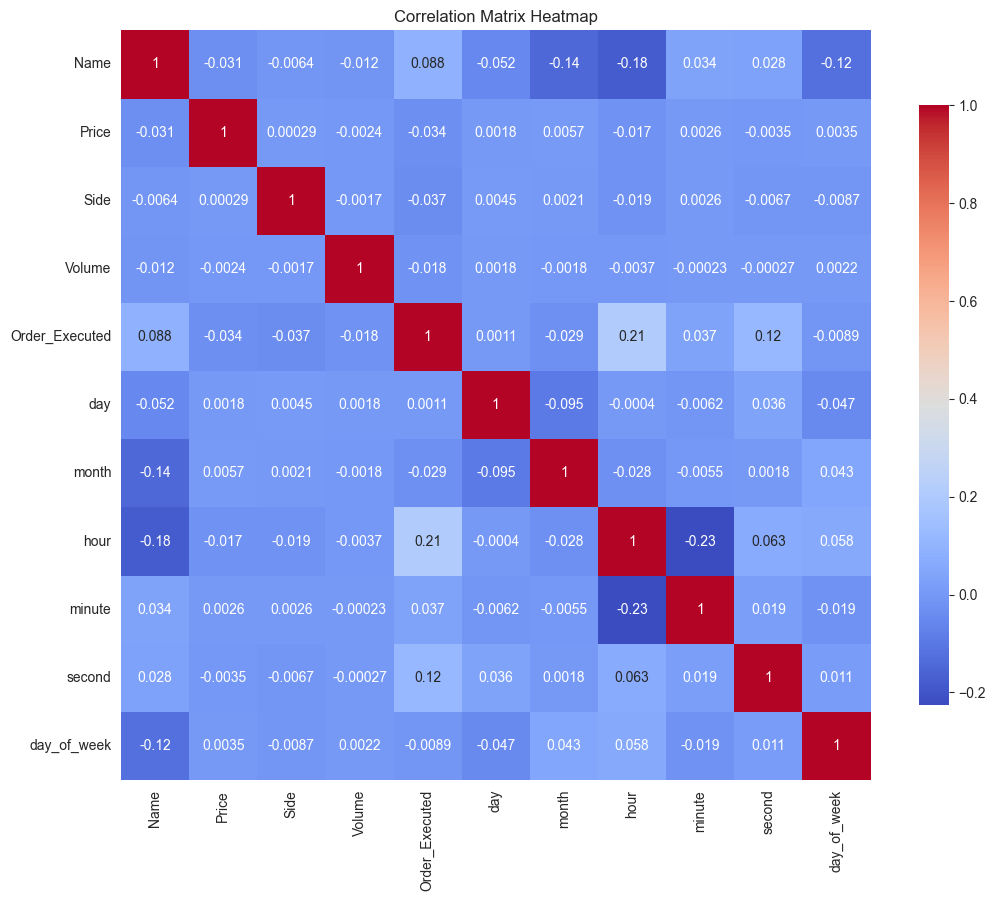

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.drop(columns=['Target','year']).corr()

# Plotting the heatmap for the correlation matrix with a larger figure size
plt.figure(figsize=(11, 9))  # Make the figure larger as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8}, xticklabels=1, yticklabels=1)  # Control label density and stretch
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()  # Adjust layout to fill space
plt.show()

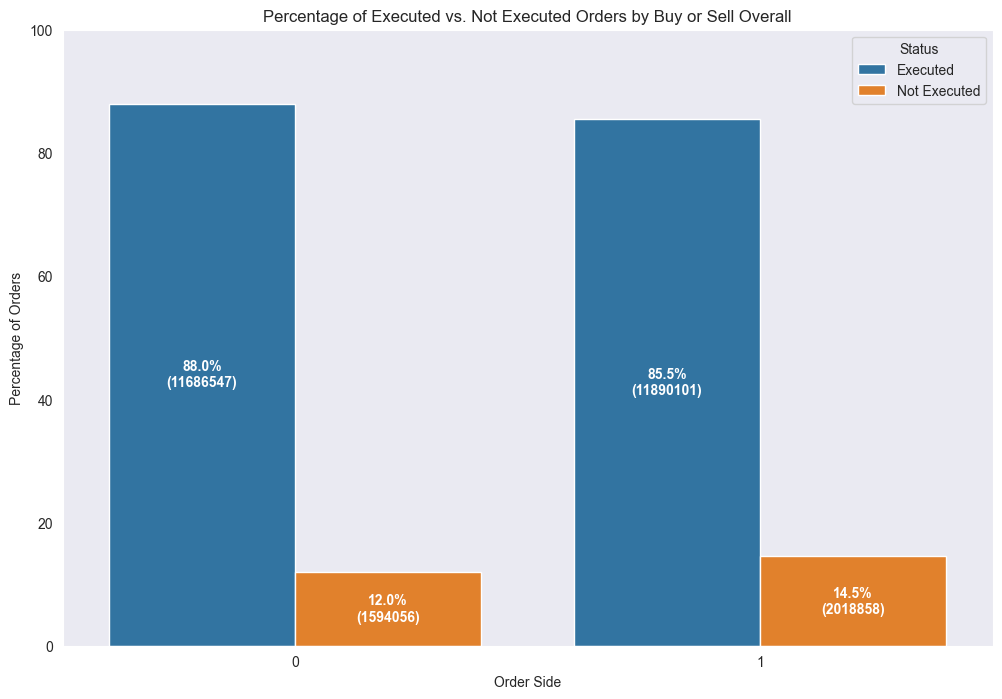

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 'Status' column to represent executed and non-executed orders
df['Status'] = df['Order_Executed'].apply(lambda x: 'Executed' if x == 1 else 'Not Executed')

# Group by 'Side' and 'Status' and calculate counts
side_status_counts = df.groupby(['Side', 'Status']).size().unstack().fillna(0)

# Calculate percentage within each side (Buy or Sell)
side_status_percent = side_status_counts.div(side_status_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
side_status_percent = side_status_percent.reset_index().melt(id_vars='Side', var_name='Status', value_name='Percentage')
side_status_counts = side_status_counts.reset_index().melt(id_vars='Side', var_name='Status', value_name='Count')

# Merge counts and percentages for annotation and reset the index
side_status_data = pd.merge(side_status_percent, side_status_counts, on=['Side', 'Status']).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Side', y='Percentage', hue='Status', data=side_status_data, palette=['#1f77b4', '#ff7f0e'])

# Annotate each bar with percentage and count
for i, bar in enumerate(bar_plot.patches):
    try:
      # Get the height (percentage) of each bar and corresponding count
      height = bar.get_height()
      count = side_status_data.loc[i, 'Count']  # Access count using .loc

      # Display percentage and count inside each bar
      bar_plot.text(
          bar.get_x() + bar.get_width() / 2,
          height / 2,  # Position text in the middle of the bar
          f'{height:.1f}%\n({int(count)})',
          ha='center',
          va='center',
          color='white',
          fontsize=10,
          fontweight='bold'
      )
    except:
      continue

plt.title('Percentage of Executed vs. Not Executed Orders by Buy or Sell Overall')
plt.xlabel('Order Side')
plt.ylabel('Percentage of Orders')
plt.ylim(0, 100)  # Set y-axis to 100% max
plt.legend(title='Status')
plt.grid(axis='y')

plt.show()


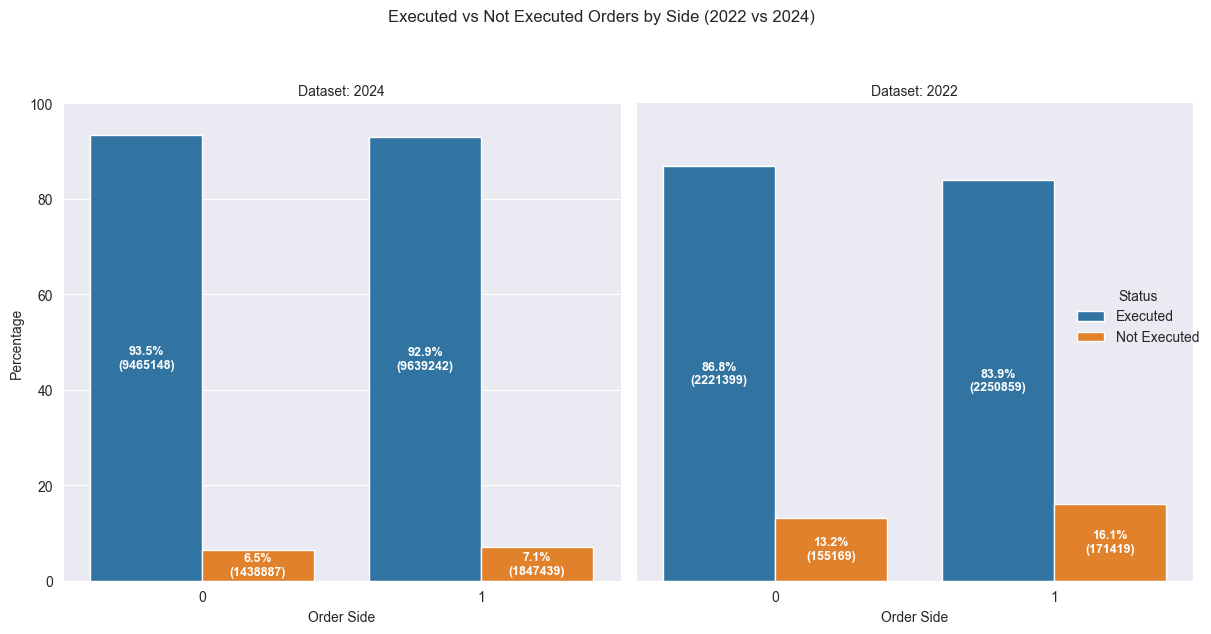

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def prepare_plot_data(df, label):
    df['Status'] = df['Order_Executed'].apply(lambda x: 'Executed' if x == 1 else 'Not Executed')
    counts = df.groupby(['Side', 'Status']).size().unstack().fillna(0)
    percent = counts.div(counts.sum(axis=1), axis=0) * 100

    percent = percent.reset_index().melt(id_vars='Side', var_name='Status', value_name='Percentage')
    counts = counts.reset_index().melt(id_vars='Side', var_name='Status', value_name='Count')

    merged = pd.merge(percent, counts, on=['Side', 'Status']).reset_index(drop=True)
    merged['Dataset'] = label
    return merged

# Prepare and combine
plot_data_2024 = prepare_plot_data(df_2024.copy(), '2024')
plot_data_2022 = prepare_plot_data(df_2022.copy(), '2022')
combined_data = pd.concat([plot_data_2024, plot_data_2022])

# Use catplot for faceted barplot
g = sns.catplot(
    data=combined_data,
    kind='bar',
    x='Side', y='Percentage',
    hue='Status',
    col='Dataset',
    palette=['#1f77b4', '#ff7f0e'],
    height=6, aspect=0.9
)

# Annotate each subplot
for ax, (_, subdata) in zip(g.axes.flat, combined_data.groupby('Dataset')):
    for bars, (_, row) in zip(ax.patches, subdata.iterrows()):
        height = bars.get_height()
        ax.text(
            bars.get_x() + bars.get_width() / 2,
            height / 2,
            f"{height:.1f}%\n({int(row['Count'])})",
            ha='center', va='center',
            color='white', fontsize=9, fontweight='bold'
        )

g.set_titles("Dataset: {col_name}")
g.set_axis_labels("Order Side", "Percentage")
g.fig.suptitle("Executed vs Not Executed Orders by Side (2022 vs 2024)", y=1.05)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


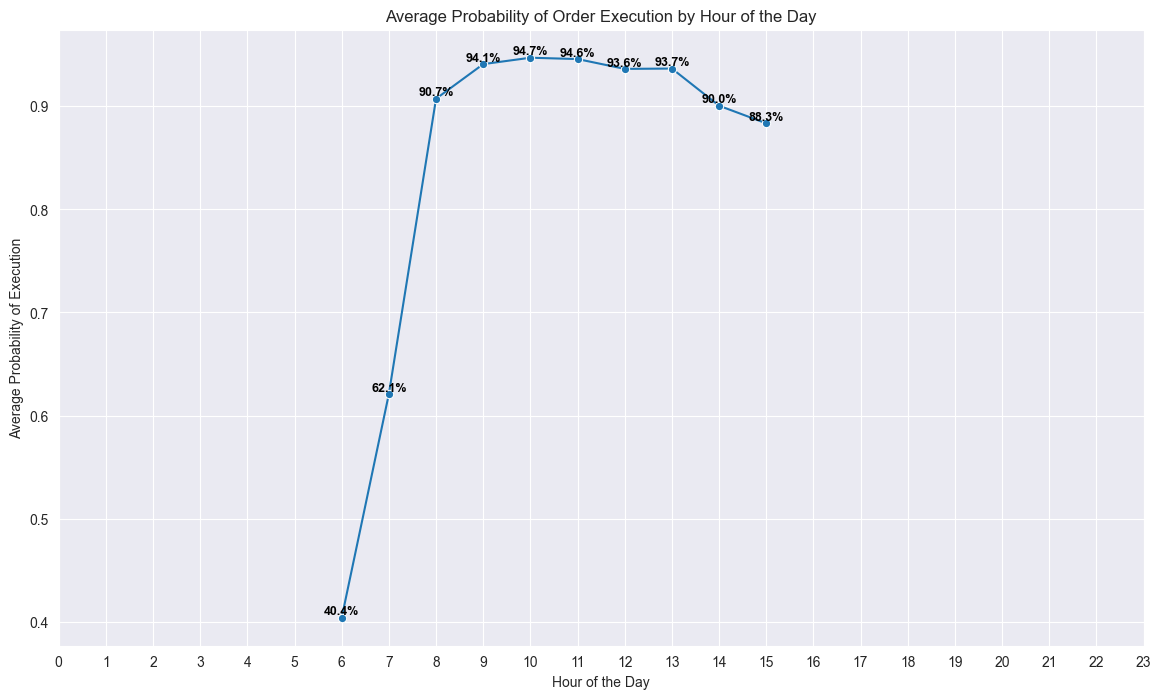

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by hour and calculate mean probability of execution
hourly_data = df.groupby('hour')['Order_Executed'].mean().reset_index()

plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='hour', y='Order_Executed', data=hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Probability of Execution')
plt.xticks(range(0, 24))
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(hourly_data)):
    plt.text(
        x=hourly_data['hour'][i],
        y=hourly_data['Order_Executed'][i],
        s=f"{hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


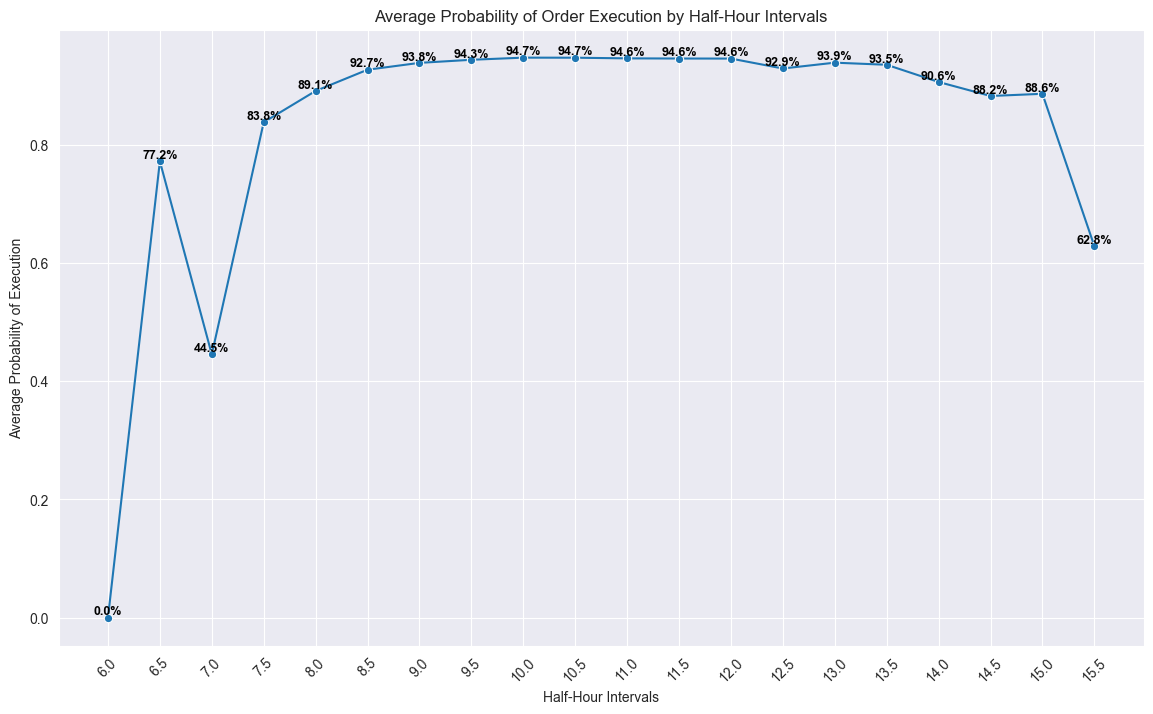

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Half_Hour' based on 'Hour' and 'Minute'
df['Half_Hour'] = df['hour'] + (df['minute'] >= 30) * 0.5

# Group by 'Half_Hour' and calculate the mean probability of execution
half_hourly_data = df.groupby('Half_Hour')['Order_Executed'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(x='Half_Hour', y='Order_Executed', data=half_hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Half-Hour Intervals')
plt.xlabel('Half-Hour Intervals')
plt.ylabel('Average Probability of Execution')
plt.xticks(half_hourly_data['Half_Hour'], rotation=45)
plt.grid(True)

# Annotate each point with the specific percentage
for i in range(len(half_hourly_data)):
    plt.text(
        x=half_hourly_data['Half_Hour'][i],
        y=half_hourly_data['Order_Executed'][i],
        s=f"{half_hourly_data['Order_Executed'][i] * 100:.1f}%",  # Convert to percentage
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

plt.show()


#DL for Classification



In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [40]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import os
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np
from tensorflow.keras.optimizers import Adam

import pandas as pd

file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification-new (1).csv"
file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification (1).csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data = pd.concat([df_2024, df_2022], ignore_index=True)

target_column = "Order_Executed"  # Target column name

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report, precision_recall_curve, roc_curve, auc,
    average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# Define a dictionary for models
models = {
    'LSTM': Sequential([
        LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),
        LSTM(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]),

    'GRU': Sequential([
        GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        GRU(32, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
}

# Compile and train each model in the loop
history_dict = {}  # To store training history for both models
y_preds = {}  # To store predictions for each model
y_probs = {}  # To store probability predictions for each model

# Loop through models
for name, model in models.items():
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"\nTraining {name} model...")

    # Train the model
    history_dict[name] = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{name} Model - Test Loss: {loss}, Test Accuracy: {accuracy}')

    # Store predictions
    y_preds[name] = model.predict(X_test)
    y_probs[name] = model.predict(X_test).flatten()

    # Classification Report
    print(f"{name} Classification Report:\n", classification_report(y_test, (y_probs[name] > 0.5)))

# Plot Precision-Recall and ROC Curves
fig, axs = plt.subplots(2, len(models), figsize=(16, 8))

for i, (name, _) in enumerate(models.items()):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs[name])
    pr_auc = auc(recall, precision)  # Integral for Precision-Recall Curve
    avg_precision = average_precision_score(y_test, y_probs[name])  # Average Precision Score
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=axs[0, i])
    axs[0, i].set_title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}, AP: {avg_precision:.4f}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs[name])
    roc_auc = auc(fpr, tpr)  # Integral for ROC Curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=axs[1, i])
    axs[1, i].set_title(f'{name} ROC Curve\nAUC: {roc_auc:.4f}')

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

#ML for Classification

In [2]:
!pip install catboost
!pip install optuna


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, roc_curve, auc,
    precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load your dataset
# from google.colab import drive
# drive.mount('/content/drive')

file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification-new (1).csv"
file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification (1).csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data = pd.concat([df_2024, df_2022], ignore_index=True)

target_column = 'Order_Executed'  # Replace with the actual target column

# Prepare the features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models to compare
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Plot Precision-Recall Curve and calculate PR AUC
plt.figure(figsize=(16, 8))
plt.suptitle('Model Evaluation: Precision-Recall and ROC Curves', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    print(f"Training and evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy score

    # Plot Precision-Recall Curve
    plt.subplot(2, len(models), i + 1)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)  # Calculate PR AUC
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot(ax=plt.gca())
    plt.title(f'{name} Precision-Recall Curve\nPR AUC: {pr_auc:.4f}')  # Display PR AUC on the plot

    # Plot ROC Curve
    plt.subplot(2, len(models), i + 1 + len(models))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)  # Calculate ROC AUC
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    roc_display.plot(ax=plt.gca())
    plt.title(f'{name} ROC Curve\nROC AUC: {roc_auc:.4f}')  # Display ROC AUC on the plot

# Show plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


KeyboardInterrupt: 

#Taking XGBOOST because its fastest and not too far from catboost. We will run optuna on it too get the best score. also k-folder cv

[I 2025-04-17 12:59:47,303] A new study created in memory with name: no-name-f65db259-a33c-4b31-9d86-0cd96b7f8fdc
C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 13:13:34,282] Trial 0 finished with value: 0.9594388508973939 and parameters: {'max_depth': 11, 'learning_rate': 0.01870757095467318, 'n_estimators': 2987, 'subsample': 0.9551992012511247, 'colsample_bytree': 0.7195732578963743, 'gamma': 8.951770157048887, 'reg_alpha': 2.289114783706276, 'reg_lambda': 3.46808315797807}. Best is trial 0 with value: 0.9594388508973939.


Trial 0 - Accuracy: 0.9594, Params: {'max_depth': 11, 'learning_rate': 0.01870757095467318, 'n_estimators': 2987, 'subsample': 0.9551992012511247, 'colsample_bytree': 0.7195732578963743, 'gamma': 8.951770157048887, 'reg_alpha': 2.289114783706276, 'reg_lambda': 3.46808315797807, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 13:24:13,686] Trial 1 finished with value: 0.960467186584265 and parameters: {'max_depth': 11, 'learning_rate': 0.03296204294146038, 'n_estimators': 2736, 'subsample': 0.7958127068567935, 'colsample_bytree': 0.8541483578016384, 'gamma': 7.157330269985232, 'reg_alpha': 4.823389428426629, 'reg_lambda': 3.3046383476817027}. Best is trial 1 with value: 0.960467186584265.


Trial 1 - Accuracy: 0.9605, Params: {'max_depth': 11, 'learning_rate': 0.03296204294146038, 'n_estimators': 2736, 'subsample': 0.7958127068567935, 'colsample_bytree': 0.8541483578016384, 'gamma': 7.157330269985232, 'reg_alpha': 4.823389428426629, 'reg_lambda': 3.3046383476817027, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 13:36:19,551] Trial 2 finished with value: 0.9640341800245793 and parameters: {'max_depth': 12, 'learning_rate': 0.0745422697475081, 'n_estimators': 2093, 'subsample': 0.9307599308503955, 'colsample_bytree': 0.5756323738116873, 'gamma': 0.9342466524623672, 'reg_alpha': 2.690040266263778, 'reg_lambda': 4.766130457115062}. Best is trial 2 with value: 0.9640341800245793.


Trial 2 - Accuracy: 0.9640, Params: {'max_depth': 12, 'learning_rate': 0.0745422697475081, 'n_estimators': 2093, 'subsample': 0.9307599308503955, 'colsample_bytree': 0.5756323738116873, 'gamma': 0.9342466524623672, 'reg_alpha': 2.690040266263778, 'reg_lambda': 4.766130457115062, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 13:45:16,986] Trial 3 finished with value: 0.9596843494921673 and parameters: {'max_depth': 10, 'learning_rate': 0.08105031035841949, 'n_estimators': 2627, 'subsample': 0.8784279172365523, 'colsample_bytree': 0.9988739568370066, 'gamma': 9.26185858601772, 'reg_alpha': 3.932514316779323, 'reg_lambda': 0.22259128672853734}. Best is trial 2 with value: 0.9640341800245793.


Trial 3 - Accuracy: 0.9597, Params: {'max_depth': 10, 'learning_rate': 0.08105031035841949, 'n_estimators': 2627, 'subsample': 0.8784279172365523, 'colsample_bytree': 0.9988739568370066, 'gamma': 9.26185858601772, 'reg_alpha': 3.932514316779323, 'reg_lambda': 0.22259128672853734, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 13:58:47,746] Trial 4 finished with value: 0.9635189088166729 and parameters: {'max_depth': 12, 'learning_rate': 0.07512168790962193, 'n_estimators': 2654, 'subsample': 0.8534720648210522, 'colsample_bytree': 0.8018665509746964, 'gamma': 2.3455552339429655, 'reg_alpha': 1.6714766220292772, 'reg_lambda': 4.888065815586086}. Best is trial 2 with value: 0.9640341800245793.


Trial 4 - Accuracy: 0.9635, Params: {'max_depth': 12, 'learning_rate': 0.07512168790962193, 'n_estimators': 2654, 'subsample': 0.8534720648210522, 'colsample_bytree': 0.8018665509746964, 'gamma': 2.3455552339429655, 'reg_alpha': 1.6714766220292772, 'reg_lambda': 4.888065815586086, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 14:09:33,313] Trial 5 finished with value: 0.9612472652651853 and parameters: {'max_depth': 12, 'learning_rate': 0.09807763981505122, 'n_estimators': 2834, 'subsample': 0.8208940519850708, 'colsample_bytree': 0.6303316438112498, 'gamma': 6.4994893753791025, 'reg_alpha': 1.0700091600743584, 'reg_lambda': 0.037046131733441956}. Best is trial 2 with value: 0.9640341800245793.


Trial 5 - Accuracy: 0.9612, Params: {'max_depth': 12, 'learning_rate': 0.09807763981505122, 'n_estimators': 2834, 'subsample': 0.8208940519850708, 'colsample_bytree': 0.6303316438112498, 'gamma': 6.4994893753791025, 'reg_alpha': 1.0700091600743584, 'reg_lambda': 0.037046131733441956, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:09:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 14:19:41,004] Trial 6 finished with value: 0.9612272208106308 and parameters: {'max_depth': 12, 'learning_rate': 0.07489071308695265, 'n_estimators': 2448, 'subsample': 0.9336263193749339, 'colsample_bytree': 0.6961747649277943, 'gamma': 5.675596355495054, 'reg_alpha': 2.9825946715922247, 'reg_lambda': 0.8444207486993788}. Best is trial 2 with value: 0.9640341800245793.


Trial 6 - Accuracy: 0.9612, Params: {'max_depth': 12, 'learning_rate': 0.07489071308695265, 'n_estimators': 2448, 'subsample': 0.9336263193749339, 'colsample_bytree': 0.6961747649277943, 'gamma': 5.675596355495054, 'reg_alpha': 2.9825946715922247, 'reg_lambda': 0.8444207486993788, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 14:31:43,859] Trial 7 finished with value: 0.9602809018827627 and parameters: {'max_depth': 10, 'learning_rate': 0.05880260102732192, 'n_estimators': 2400, 'subsample': 0.8055494322089194, 'colsample_bytree': 0.6163823943692439, 'gamma': 4.819887781916275, 'reg_alpha': 1.6274074959694222, 'reg_lambda': 0.9150161135364582}. Best is trial 2 with value: 0.9640341800245793.


Trial 7 - Accuracy: 0.9603, Params: {'max_depth': 10, 'learning_rate': 0.05880260102732192, 'n_estimators': 2400, 'subsample': 0.8055494322089194, 'colsample_bytree': 0.6163823943692439, 'gamma': 4.819887781916275, 'reg_alpha': 1.6274074959694222, 'reg_lambda': 0.9150161135364582, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 14:45:04,637] Trial 8 finished with value: 0.9603814919436924 and parameters: {'max_depth': 11, 'learning_rate': 0.03443479422215206, 'n_estimators': 2210, 'subsample': 0.9037058789212246, 'colsample_bytree': 0.7140907798535114, 'gamma': 6.018355995776469, 'reg_alpha': 2.319617534223468, 'reg_lambda': 3.704275456077404}. Best is trial 2 with value: 0.9640341800245793.


Trial 8 - Accuracy: 0.9604, Params: {'max_depth': 11, 'learning_rate': 0.03443479422215206, 'n_estimators': 2210, 'subsample': 0.9037058789212246, 'colsample_bytree': 0.7140907798535114, 'gamma': 6.018355995776469, 'reg_alpha': 2.319617534223468, 'reg_lambda': 3.704275456077404, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-04-17 14:56:56,869] Trial 9 finished with value: 0.9610339481341463 and parameters: {'max_depth': 12, 'learning_rate': 0.05671907184785685, 'n_estimators': 2505, 'subsample': 0.7679251823588618, 'colsample_bytree': 0.6255837550837011, 'gamma': 6.05532721067668, 'reg_alpha': 3.579196615415681, 'reg_lambda': 1.252915264537876}. Best is trial 2 with value: 0.9640341800245793.


Trial 9 - Accuracy: 0.9610, Params: {'max_depth': 12, 'learning_rate': 0.05671907184785685, 'n_estimators': 2505, 'subsample': 0.7679251823588618, 'colsample_bytree': 0.6255837550837011, 'gamma': 6.05532721067668, 'reg_alpha': 3.579196615415681, 'reg_lambda': 1.252915264537876, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}
{'max_depth': 12, 'learning_rate': 0.0745422697475081, 'n_estimators': 2093, 'subsample': 0.9307599308503955, 'colsample_bytree': 0.5756323738116873, 'gamma': 0.9342466524623672, 'reg_alpha': 2.690040266263778, 'reg_lambda': 4.766130457115062, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}


C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:57:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


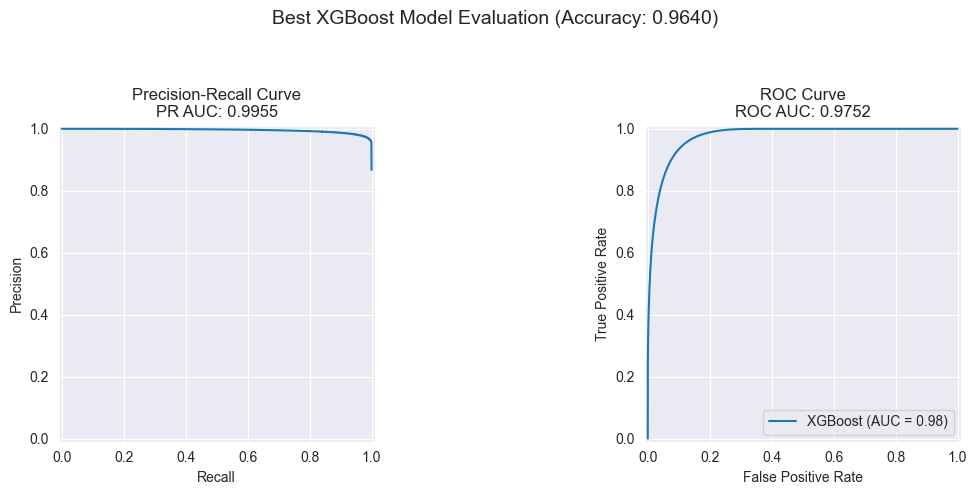

(None,
 {'max_depth': 12,
  'learning_rate': 0.0745422697475081,
  'n_estimators': 2093,
  'subsample': 0.9307599308503955,
  'colsample_bytree': 0.5756323738116873,
  'gamma': 0.9342466524623672,
  'reg_alpha': 2.690040266263778,
  'reg_lambda': 4.766130457115062,
  'use_label_encoder': False,
  'eval_metric': 'logloss',
  'random_state': 42},
 0.9640341800245793,
 np.float64(0.9955066918441983),
 np.float64(0.9752202337773775))

In [7]:
# Re-import required libraries after code execution state reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import optuna

# Re-upload files
file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification-new (1).csv"
file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Classification (1).csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

# Combine datasets
data = pd.concat([df_2024, df_2022], ignore_index=True)

# Prepare features and target
target_column = 'Order_Executed'
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optuna objective function
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 10, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 2000, 3000),
        'subsample': trial.suggest_float('subsample', 0.75, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Trial {trial.number} - Accuracy: {acc:.4f}, Params: {params}")
    return acc

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Train best model
best_params = study.best_params
best_params.update({'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42})
print(best_params)
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

# Prepare plots
plt.figure(figsize=(12, 5))
plt.suptitle(f'Best XGBoost Model Evaluation (Accuracy: {accuracy:.4f})', fontsize=14)

# Precision-Recall
plt.subplot(1, 2, 1)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(ax=plt.gca())
plt.title(f'Precision-Recall Curve\nPR AUC: {pr_auc:.4f}')

# ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="XGBoost")
roc_display.plot(ax=plt.gca())
plt.title(f'ROC Curve\nROC AUC: {roc_auc:.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show(), best_params, accuracy, pr_auc, roc_auc


#DL for Forecasting

In [28]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv'
data = pd.read_csv(file_path)
target_column = "Avg_Order_Executed"  # Replace with your target column for regression

# Separate features and target
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM/GRU compatibility (samples, timesteps=1, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define LSTM and GRU models
models = {
    'LSTM': Sequential([
        LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        LSTM(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ]),
    'GRU': Sequential([
        GRU(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        BatchNormalization(),
        Dropout(0.1),
        GRU(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1)  # Regression task
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Compile the model
    model.compile(optimizer='adam', loss='mse')  # Use MSE for regression

    print(f"\nTraining {name} model...")

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=4, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Predictions': y_pred}

    print(f"{name} Model - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

    # Plot Predictions vs True Values for each model
    plt.figure(figsize=(12, 8))  # Create a larger figure to accommodate subplots
    for i, (name, result) in enumerate(results.items()):
        y_pred = result['Predictions']

        # Plot predictions vs true values
        plt.subplot(2, 2, i + 1)
        plt.plot(range(len(y_test)), y_test, label="True Values", alpha=0.7)
        plt.plot(range(len(y_pred)), y_pred, label="Predictions", alpha=0.7)
        plt.title(f'{name}: Predictions vs True Values')
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Fintech_Proj/processed_timestamp_data_Prediction.csv'

#ML for Forecasting

In [8]:
!pip install --upgrade tsfresh
!pip install scipy==1.9.3


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.0 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.8 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 3.6 MB/s eta 0:00:02
   --------------------------------- ------ 8.1/9.8 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 4.2/4.2 MB 50.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 41.4 MB/s eta 0:00:00
   -----------------------------------

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [45 lines of output]
  + meson setup C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8 C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv\meson-python-native-file.ini
  The Meson build system
  Version: 1.7.2
  Source dir: C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8
  Build dir: C:\Users\Shalev\AppData\Local\Temp\pip-install-gecwqsaf\scipy_3fd22c5506604f27949a456af5e7e9f8\.mesonpy-fkvg4jzv
  Build type: native build
  Project name: SciPy
  Project version: 1.9.3
  Activating VS 17.12.4
  C compiler for the host machine: cl (msvc 

C:\Users\Shalev\AppData\Local\Temp\ipykernel_22500\1392929257.py:21: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data["time"] = data["time"].view("int64")                        # keep numeric
Rolling: 100%|██████████| 30/30 [00:03<00:00,  8.54it/s]
Feature Extraction: 0it [00:00, ?it/s]



XGBoost  |  MSE: 0.0022  MAE: 0.0184  R²: 0.9554
       True      Pred  Day  Month
0  0.957704  0.942658  8.0    3.0
1  0.950376  0.945306  8.0    3.0
2  0.937236  0.943835  8.0    3.0
3  0.929745  0.941363  8.0    3.0
4  0.941706  0.939284  8.0    3.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data points in the train set: 1946, number of used features: 16
[LightGBM] [Info] Start training from score 0.859917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

C:\Users\Shalev\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



CatBoost  |  MSE: 0.0020  MAE: 0.0208  R²: 0.9590
       True      Pred  Day  Month
0  0.957704  0.938202  8.0    3.0
1  0.950376  0.946706  8.0    3.0
2  0.937236  0.946984  8.0    3.0
3  0.929745  0.942295  8.0    3.0
4  0.941706  0.941484  8.0    3.0


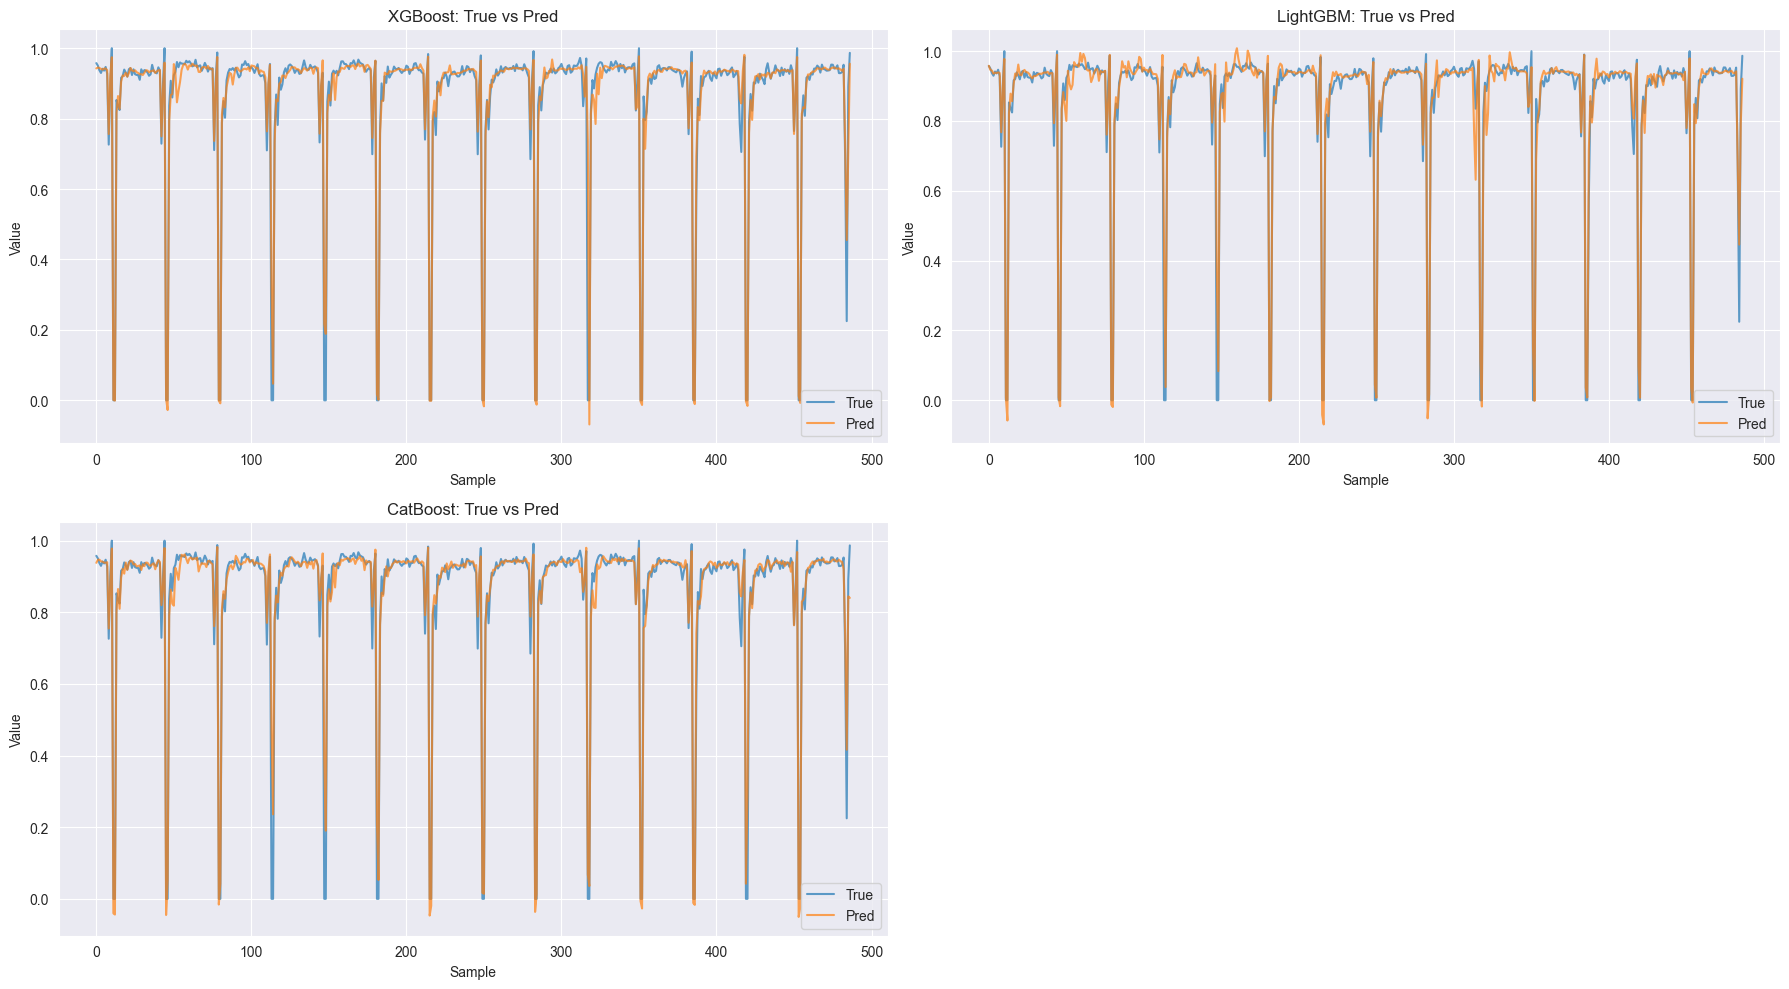

In [23]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame, impute
from tsfresh.feature_extraction.settings import EfficientFCParameters, MinimalFCParameters
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ── 1. Load and clean ──────────────────────────────────────────────────────────
data = pd.read_csv(r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction-new.csv")

data["time"] = pd.to_datetime(data[["Year", "Month", "Day", "Hour", "Minute", "Second"]])
data.drop(columns=["Year", "Hour", "Minute", "Second",
                   "Target_0", "Target_35", "Target_65", "Target_90"],
          inplace=True)
data["time"] = data["time"].view("int64")                        # keep numeric
assert data["time"].diff().fillna(1).gt(0).all(), "timestamps not increasing"
data = data.loc[:, data.var() != 0]                              # drop constants

# ── 2. Lag features ────────────────────────────────────────────────────────────
def add_lags(df, col, n):
    for lag in range(1, n + 1):
        df[f"{col}_lag{lag}"] = df[col].shift(lag)
    df[f"{col}_moving_avg_7"] = df[col].rolling(7).mean()
    return df

TARGET = "Avg_Order_Executed"
LAGS   = 8
data   = add_lags(data, TARGET, LAGS).dropna()

# ── 3. TSFresh features ────────────────────────────────────────────────────────
ts_frame, _ = make_forecasting_frame(data[TARGET], kind="ts", max_timeshift=LAGS,rolling_direction=1 )
ts_frame    = ts_frame.apply(pd.to_numeric, errors="coerce").dropna()
val_col = ts_frame.columns.difference(["id", "time"])[0]      # usually “value”
ts_frame = ts_frame[ts_frame.groupby("id")[val_col].transform("std").fillna(0) > 0]
ts_feat = extract_features(
    ts_frame,
    column_id="id",
    column_sort="time",
    default_fc_parameters=MinimalFCParameters(),
    impute_function=impute,
    n_jobs=0
)

# keep only overlapping rows
n = min(len(data), len(ts_feat))
data   = data.iloc[-n:].reset_index(drop=True)
ts_feat = ts_feat.iloc[-n:].reset_index(drop=True)
data   = pd.concat([data, ts_feat], axis=1).fillna(0)

# ── 4. Train / test split ──────────────────────────────────────────────────────
X = data.drop(columns=[TARGET])
y = data[TARGET]
dates = data[["Day", "Month"]]

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.20, shuffle=False
)

scaler   = StandardScaler()
X_train  = scaler.fit_transform(X_train.apply(pd.to_numeric, errors="coerce").fillna(0))
X_test   = scaler.transform(X_test.apply(pd.to_numeric, errors="coerce").fillna(0))

# ── 5. Models ──────────────────────────────────────────────────────────────────
models = {
    "XGBoost":  XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, max_depth=5, learning_rate=0.1,
                                  random_state=42, verbose=False),
}

plt.figure(figsize=(18, 10))

for i, (name, model) in enumerate(models.items(), start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}  |  MSE: {mean_squared_error(y_test, y_pred):.4f}"
          f"  MAE: {mean_absolute_error(y_test, y_pred):.4f}"
          f"  R²: {r2_score(y_test, y_pred):.4f}")

    res = pd.DataFrame({
        "True": y_test.values,
        "Pred": y_pred,
        "Day":  dates_test["Day"].values,
        "Month": dates_test["Month"].values
    })
    print(res.head())

    plt.subplot(2, 2, i)
    plt.plot(y_test.values, label="True", alpha=0.7)
    plt.plot(y_pred,        label="Pred", alpha=0.7)
    plt.title(f"{name}: True vs Pred")
    plt.xlabel("Sample")
    plt.ylabel("Value")
    plt.legend()

plt.tight_layout()
plt.show()


#Arima Model for Forecasting

In [103]:
!pip uninstall -y pmdarima numpy

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4


You can safely remove it manually.


In [107]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)


In [11]:
"""
Auto‑ARIMA for Avg_Order_Executed with 15min steps and 30min seasonality.

pip install pmdarima
"""
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# 1⃣ Load -----------------------------------------------------------------
file_path_2024 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction.csv"
file_path_2022 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction-new.csv"

df_2024 = pd.read_csv(file_path_2024)
df_2022 = pd.read_csv(file_path_2022)

data_arima = pd.concat([df_2024, df_2022], ignore_index=True)

# Build timestamp from date parts
data_arima["timestamp"] = pd.to_datetime({
    "year":   data_arima["Year"],
    "month":  data_arima["Month"],
    "day":    data_arima["Day"],
    "hour":   data_arima["Hour"],
    "minute": data_arima["Minute"],
    "second": data_arima["Second"]
})
data_arima = data_arima.sort_values("timestamp").set_index("timestamp")

# 2⃣ Target series with 15min uniform steps ------------------------------
y = data_arima["Avg_Order_Executed"]

# Reindex to uniform 15min steps and fill missing values
expected_freq = pd.Timedelta(minutes=15)
full_index = pd.date_range(start=y.index[0], end=y.index[-1], freq=expected_freq)
y = y.reindex(full_index).fillna(method='ffill')

# 3⃣ Train / test split ---------------------------------------------------
split = int(len(y) * 0.8)
y_train, y_test = y[:split], y[split:]

# 4⃣ Auto‑ARIMA search ----------------------------------------------------
seasonal_period = 4  # 1 hour seasonality (4 * 15min)
model = auto_arima(
    y_train,
    seasonal=True,
    m=seasonal_period,
    stepwise=False,
    error_action="ignore",
    suppress_warnings=True,
    n_jobs=-1,                   # parallel
    information_criterion="aicc",
    trace=True
)

# 5⃣ Back‑test ------------------------------------------------------------
pred = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
print("MSE:", mean_squared_error(y_test, pred), "|  MAE:", mean_absolute_error(y_test, pred))
print(model.summary())
model.update(y_test)

# 6⃣ Future forecast ------------------------------------------------------
future_horizon = 8
step = y.index[-1] - y.index[-2]  # will be 15 min

# continue from last timestamp exactly
last_timestamp = y.index[-1]
future_index = [last_timestamp + step * (i + 1) for i in range(future_horizon)]

future_values = model.predict(n_periods=future_horizon)
future = pd.Series(future_values, index=future_index)

print(future.head())



Best model:  ARIMA(3,1,2)(0,0,0)[4] intercept
Total fit time: 303.994 seconds
MSE: 0.00782584831643611 |  MAE: 0.06145150270067116
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                52941
Model:               SARIMAX(3, 1, 2)   Log Likelihood              103402.142
Date:                Wed, 23 Apr 2025   AIC                        -206790.284
Time:                        15:52:10   BIC                        -206728.146
Sample:                    09-05-2022   HQIC                       -206770.871
                         - 03-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.109e-06    7.5e-05      0.028      0.978      -0.000       0.000

#Transformer Model

In [4]:
!pip install chronos-forecasting

In [3]:
!pip install "chronos-forecasting[training] @ git+https://github.com/amazon-science/chronos-forecasting.git"


  Cloning https://github.com/amazon-science/chronos-forecasting.git to c:\users\shalev\appdata\local\temp\pip-install-ej5rf5vb\chronos-forecasting_127fc78f09e446cab44c6daf503c3aea
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit f40a266a550e37ac16cb6c46dd29a6183f39f618
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git 'C:\Users\Shalev\AppData\Local\Temp\pip-install-ej5rf5vb\chronos-forecasting_127fc78f09e446cab44c6daf503c3aea'


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import torch
from chronos import ChronosPipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load & concatenate
file1 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction.csv"
file2 = r"C:\Users\Shalev\Downloads\processed_timestamp_data_Prediction-new.csv"
df = pd.concat([pd.read_csv(file1), pd.read_csv(file2)], ignore_index=True)

# 2. Build 15-min index and interpolate
df["timestamp"] = pd.to_datetime({
    "year": df["Year"], "month": df["Month"], "day": df["Day"],
    "hour": df["Hour"], "minute": df["Minute"], "second": df["Second"]
})
df = df.set_index("timestamp").sort_index()
df = df.resample("15T").mean().interpolate()

# 3. Add covariates for ARIMA
df["dow"] = df.index.dayofweek
df["hod"] = df.index.hour

# 4. Split series & exogs
series      = df["Avg_Order_Executed"].astype(float)
exog        = df[["dow","hod"]]
horizon     = 12
train, test = series[:-horizon], series[-horizon:]
exog_train, exog_test = exog.iloc[:-horizon], exog.iloc[-horizon:]

# 5. Seasonal ARIMA with exog
arima = pm.auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True, m=12,
    stepwise=True,
    error_action="ignore",
    suppress_warnings=True
)
pred_arima = arima.predict(n_periods=horizon, exogenous=exog_test)

# 6. Chronos-T5 forecast (single sample)
ctx    = torch.from_numpy(train.to_numpy(dtype="float32")).unsqueeze(0)
pipe_t5 = ChronosPipeline.from_pretrained("amazon/chronos-t5-large", device_map="cpu")
raw    = pipe_t5.predict(
    context=ctx,
    prediction_length=horizon,
    limit_prediction_length=True,
    num_samples=1
)
arr    = raw.cpu().numpy()
if arr.ndim == 2: arr = arr[:, None, :]
mean_t5   = arr.mean(axis=1).squeeze(0)
median_t5 = np.quantile(arr, 0.5, axis=1).squeeze(0)

# 7. Ensemble = average of ARIMA & T5-mean
ensemble = (pred_arima + mean_t5) / 2

# 8. Compute metrics
def compute(name, y_true, y_pred):
    return {
        "model": name,
        "MSE":   mean_squared_error(y_true, y_pred),
        "MAE":   mean_absolute_error(y_true, y_pred),
        "R2":    r2_score(y_true, y_pred)
    }

metrics = [
    compute("ARIMA",    test,          pred_arima),
    compute("T5-mean",  test,          mean_t5),
    compute("T5-med",   test,          median_t5),
    compute("Ensemble", test,          ensemble),
]
print(pd.DataFrame(metrics).set_index("model"))

# 9. Plot 3-hour forecast vs true
times = df.index[-horizon:]
plt.figure(figsize=(8,4))
plt.plot(times, test.values,    label="True",    marker='o')
plt.plot(times, pred_arima,     label="ARIMA",   marker='x')
plt.plot(times, mean_t5,        label="T5-mean", marker='^')
plt.plot(times, ensemble,       label="Ensemble", linestyle='--')
plt.legend()
plt.title("3-Hour Forecast vs True")
plt.tight_layout()
plt.show()


C:\Users\Shalev\AppData\Local\Temp\ipykernel_27852\2091673423.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample("15T").mean().interpolate()


MemoryError: Unable to allocate 114. MiB for an array with shape (15, 15, 66166) and data type float64